# ETS Model

- ETS Model은 오차(E), 추세(T), 계절성(S) 세 요소를 더하거나 곱하거나 혹은 일부를 사용하지 않고 데이터를 평활화한다.

- 모델에 따라 주요 요소에 기반해 각 데이터에 맞는 일반화 모형을 만들 수 있다.

- 어떤 시계열 데이터의 일반적 특성을 이해하기 위해선 오차, 추세, 계절성에 기반해 시각화를 하는게 좋음

## Trend
![image](https://user-images.githubusercontent.com/70187490/150709208-906cefc0-58e0-421f-8a40-5d26848bd2dd.png)
- 위의 그래프에서 전체적으로 증가하는 추세를 보이고 있는데 이를 Trend 요소라고 함
- Trend 요소에는 두 가지 추세로 나뉘는데 '선형 추세'와 '지수형 추세'가 있다.
- 위의 그래프에선 지수형인지 선형인지 확실히 알수 어려운데 이는 추세에 더해 계절성이 보이기 때문

## Season
- 위 그래프의 특징 중 하나는 각 해마다 월별로 변동이 반복되는 경향이 있다는 점
- 여름철에 방학이 있고 더불어 날씨가 좋아 휴가를 많이 가는 점이 여름기간 동안 승객의 수가 증가를 부추긴다고 볼수 있다.
- 그러므로 증가하는 전반적인 추세에 더해 매 해 반복되는 계절성이 보인다고 볼수 있다.

## ETS 분해
![image](https://user-images.githubusercontent.com/70187490/150709667-d0b58d2d-643a-4593-865c-dd2e27125424.png)

- statsmodels의 ETS 분해를 실행하면 datetime을 x축으로 그려진 네 개의 plot들을 리턴함
- 제일 위에는 원본 데이터의 plot
- ETS 분해는 이를 추세, 계절성, 잔차항으로 나눌 수 있다.
- 추세 항은 데이터 셋에 다르지만 실제 데이터 포인트의 전반적인 상승 혹은 하강세를 보여줌
- 추세 항은 전반적으로 상승하는 추세를 보여줘서 이 추세가 지수형인지 선형인지를 가늠하게 해준다.
- 다음으로 분리된 계절성 변동을 볼 수 있다.
- 이는 기본적으로 위 그래프의 반복되는 계절성 요소들을 직선화한 것이다.
- 즉 추세선을 완전히 배재하고 난 계절성 요소
- 마지막으로는 잔차 요소가 있는데 이는 추세나 계절성으로 설명되지 않는 것들을 나타냄
- 다시 말해 추세항이나 계절성 항으로 설명되지 않는 잔차나 오차들이 잔차항에 표시된다.
- 그렇기 때문에 잔차는 잡음과 비슷하게 보여짐
- 이를 이용하여 역으로 잔차는 데이터 셋의 어디에 노이즈가 많은지 혹은 그렇지 않은지를 나타내주는 역할을 한다.
- 위 그래프에선 데이터셋의 앞부분이 중간부분보다 잡음이 더 많은 혹은 오차나 잔차가 더 큰 것으로 보여짐

## ETS 분해의 핵심 요소
- ETS 분해에는 '덧셈 모델', '곱셉 모델' 두 종류가 있다.
- 덧셈 모델은 매년 만명의 승객이 증가하는 것과 같이 추세가 선형에 더 가깝고 계절성이 거의 일정해 보일 때 적용할 수 있다.
- 곱셈 모델은 매년 승객의 수가 전년도에 비해 두배로 늘어나는, 즉 지수적 증감하는 경우와 같이 비선형적으로 증가 혹은 감소하는 경우에 더 적합하다.

In [5]:
import pandas as pd
import numpy as np

airline = pd.read_csv('../Data/airline_passengers.csv',
                      index_col='Month', 
                      parse_dates=True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
airline.dropna(inplace=True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


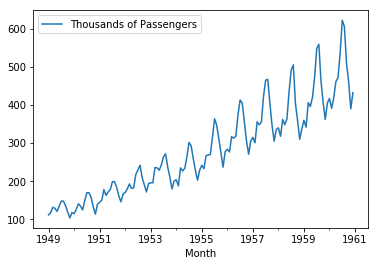

In [7]:
airline.plot();

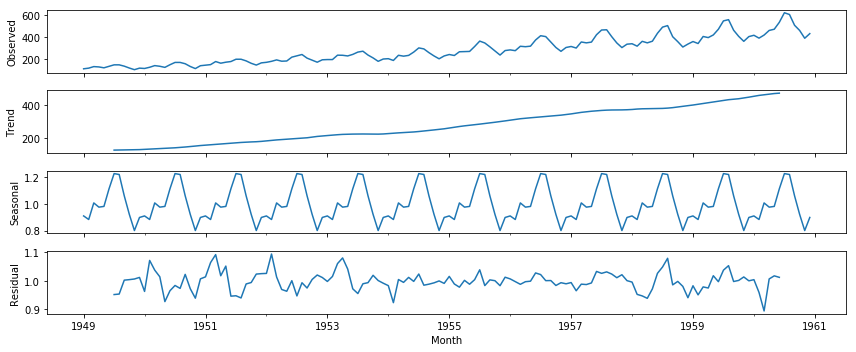

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(airline['Thousands of Passengers'],
                            model='multuplicative')
from pylab import rcParams
rcParams['figure.figsize'] = 12, 5

result.plot();